In [ ]:
# adultKNN :---

In [15]:
import pandas as pd

In [16]:
aknn=pd.read_csv(r"C:\Users\HARSH\Dropbox\PC\Desktop\python dataset\adultKNN.csv")

In [17]:
aknn.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [570]:
aknn.shape

(48842, 15)

In [18]:
# finding nulls :--

In [19]:
aknn.isnull().sum()[aknn.isnull().sum() > 0]

Series([], dtype: int64)

In [20]:
# no nulls are there 

In [21]:
# '?' as nulls 

In [22]:
import numpy as np

In [23]:
aknn = aknn.replace({'?': np.nan})   # converting ? to nulls 

In [14]:
aknn.isnull().sum()[aknn.isnull().sum() >0]

Series([], dtype: int64)

In [11]:
# now fillna 

In [26]:
# replace all objects with numeric values:-   
aknn.education.replace({'11th':7, 'HS-grad':9, 'Assoc-acdm':11, 'Some-college':10, '10th':6,
       'Prof-school':14, '7th-8th':4, 'Bachelors':13, 'Masters':15, 'Doctorate':16,
       '5th-6th':3, 'Assoc-voc':12, '9th':5, '12th':8, '1st-4th':2, 'Preschool':1} ,inplace = True)

aknn.gender.replace({'Male':1, 'Female':0} ,inplace = True)
aknn.income.replace({'<=50K':0, '>50K':1} ,inplace = True)

In [27]:
# replace with le fit:-

import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

aknn.workclass = le.fit_transform(aknn.workclass)
aknn['marital-status'] = le.fit_transform(aknn['marital-status'])
aknn.occupation = le.fit_transform(aknn.occupation)
aknn.relationship = le.fit_transform(aknn.relationship)
aknn.race = le.fit_transform(aknn.race)
aknn['native-country']= le.fit_transform(aknn['native-country'])

In [24]:


aknn.occupation.fillna('other' , inplace = True)

aknn.workclass.fillna('Private' , inplace = True)

aknn['native-country'].fillna('United-States' , inplace = True)

In [28]:
aknn.isnull().sum()[aknn.isnull().sum() >0]

Series([], dtype: int64)

In [ ]:
# replace objects into numeric

In [51]:
# sampling :--

from sklearn.model_selection import train_test_split
aknn_train , aknn_test  =train_test_split(aknn , test_size= .2 , random_state=123)

# # oversampling stage:-
# df1 = aknn_train[aknn_train.income == 1]
# aknn_train = pd.concat([aknn_train , df1 , df1 ])

aknn_train_x= aknn_train.iloc[ : , 0:-1] # it will take from starting to y
aknn_train_y= aknn_train.iloc[ : , -1] 

aknn_test_x= aknn_train.iloc[ : , 0:-1] # it will take from starting to y
aknn_test_y= aknn_train.iloc[ : , -1] 

# logestic regression :---

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='Balanced')

In [53]:
logreg.fit(aknn_train_x , aknn_train_y)

LogisticRegression(class_weight='Balanced')

In [54]:
# prediction :---

pred_logreg = logreg.predict(aknn_test_x)

In [55]:
# building confusion matrix :--

from sklearn.metrics import confusion_matrix ,classification_report

In [56]:
tab_aknn = confusion_matrix(aknn_test_y , pred_logreg)
tab_aknn

array([[22385,  7353],
       [11868, 16137]], dtype=int64)

In [57]:
print(classification_report(aknn_test_y , pred_logreg))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70     29738
           1       0.69      0.58      0.63     28005

    accuracy                           0.67     57743
   macro avg       0.67      0.66      0.66     57743
weighted avg       0.67      0.67      0.66     57743



In [58]:
# representation :-- 

In [59]:
tab_aknn = pd.DataFrame (tab_aknn)
tab_aknn.columns = ['<=50' , '>50']
tab_aknn.index   = ['<=50' , '>50']
tab_aknn

,<=50,>50
<=50,22385,7353
>50,11868,16137


In [60]:
aknn_test_y.shape

(57743,)

In [544]:
# AUROC :--

In [546]:
# evaluation 

# AUROC (plot and the area)

In [547]:
# prediction under probabilities

pred_logreg_proba = logreg.predict_proba(aknn_train_x)

In [548]:
from sklearn.metrics import roc_curve ,  roc_auc_score

In [549]:
# area under the curve :--

roc_auc_score(aknn_test_y, pred_logreg_proba[: , 1])  

0.7673033062212344

In [550]:
fpr , tpr , thre =roc_curve(aknn_test_y ,pred_logreg_proba[: , 1]) 

In [551]:
import matplotlib.pyplot as plt

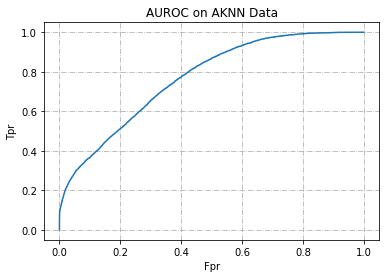

In [552]:
plt.plot(fpr , tpr)
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.title("AUROC on AKNN Data")
plt.grid(linestyle='-.')


In [ ]:
# try chisquare here and plots 

In [553]:
from scipy.stats import chi2_contingency

In [557]:
pvalue_list = []
for i in aknn_test_x.columns :
    tab_chi = pd.crosstab(aknn_train_x[i], aknn_train_y)
    pvalue = chi2_contingency(tab_chi)[1]
    #print(i ,  ''   , pvalue)
    pvalue_list.append(pvalue)

In [567]:
feat_imp_chi = pd.DataFrame()
feat_imp_chi['Features'] = aknn_train_x.columns
feat_imp_chi['Importance'] = pvalue_list
feat_imp_chi.sort_values('Importance')


,Features,Importance
0,age,0.000000e+00
1,workclass,0.000000e+00
2,fnlwgt,0.000000e+00
3,education,0.000000e+00
4,educational-num,0.000000e+00
5,marital-status,0.000000e+00
6,occupation,0.000000e+00
7,relationship,0.000000e+00
9,gender,0.000000e+00
10,capital-gain,0.000000e+00


In [569]:
feat_imp_chi[feat_imp_chi.Importance <= 0.05]

,Features,Importance
0,age,0.000000e+00
1,workclass,0.000000e+00
2,fnlwgt,0.000000e+00
3,education,0.000000e+00
4,educational-num,0.000000e+00
5,marital-status,0.000000e+00
6,occupation,0.000000e+00
7,relationship,0.000000e+00
8,race,9.786323e-200
9,gender,0.000000e+00


In [ ]:
# l1 = list(feat_imp_chi.Features[0:10])
# l1.append('income')
# l1

############################## Decision Tree######################################################

In [149]:
aknn=pd.read_csv(r"C:\Users\HARSH\Dropbox\PC\Desktop\python dataset\adultKNN.csv")

In [150]:
aknn.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [151]:
aknn = aknn.replace({'?': np.nan}) 

In [152]:
aknn.isnull().sum()[aknn.isnull().sum() >0]

workclass         2799
occupation        2809
native-country     857
dtype: int64

In [153]:


aknn.occupation.fillna('other' , inplace = True)

aknn.workclass.fillna('Private' , inplace = True)

aknn['native-country'].fillna('United-States' , inplace = True)

In [154]:
# replace all objects with numeric values:-   
aknn.education.replace({'11th':7, 'HS-grad':9, 'Assoc-acdm':11, 'Some-college':10, '10th':6,
       'Prof-school':14, '7th-8th':4, 'Bachelors':13, 'Masters':15, 'Doctorate':16,
       '5th-6th':3, 'Assoc-voc':12, '9th':5, '12th':8, '1st-4th':2, 'Preschool':1} ,inplace = True)

aknn.gender.replace({'Male':1, 'Female':0} ,inplace = True)
aknn.income.replace({'<=50K':0, '>50K':1} ,inplace = True)

In [155]:
# replace with le fit:-

import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

aknn.workclass = le.fit_transform(aknn.workclass)
aknn['marital-status'] = le.fit_transform(aknn['marital-status'])
aknn.occupation = le.fit_transform(aknn.occupation)
aknn.relationship = le.fit_transform(aknn.relationship)
aknn.race = le.fit_transform(aknn.race)
aknn['native-country']= le.fit_transform(aknn['native-country'])

In [156]:
# identify the objects:- 
aknn.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
# feature imp line:-#### this line should be just before sampling stage 
aknn = aknn.loc[:,l1]

#### sampling in dt

In [160]:
# sampling :--

from sklearn.model_selection import train_test_split
aknn_train , aknn_test  =train_test_split(aknn , test_size= .2 , random_state=123)

# # oversampling stage:-
# df1 = aknn_train[aknn_train.income == 1]
# aknn_train = pd.concat([aknn_train , df1 , df1 ])

aknn_train_x= aknn_train.iloc[ : , 0:-1] # it will take from starting to before y
aknn_train_y= aknn_train.iloc[ : , -1] # this will take y 

aknn_test_x= aknn_train.iloc[ : , 0:-1] # it will take from starting to before y
aknn_test_y= aknn_train.iloc[ : , -1] # this will take y 

In [ ]:
# model building in DT:---

In [161]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_split=25)

In [162]:
dt.fit(aknn_train_x , aknn_train_y)

DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=25)

In [90]:
# from sklearn.model_selection import GridSearchCV

In [91]:
# search_dict = {'criterion':['gini','entropy'] , 
#                'max_depth':range(5,10) , 
#                 'min_samples_split':range(25,30)}

In [92]:
# grid = GridSearchCV(dt , param_grid=search_dict)

In [94]:
# grid.fit(aknn_train_x , aknn_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 10),
                         'min_samples_split': range(25, 30)})

In [95]:
# grid.best_params_ #'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 25

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 25}

In [ ]:
# pred_test_dt = grid.predict(aknn_test_x)

In [163]:
pred_test_dt = dt.predict(aknn_test_x)

In [164]:
# confusion matrix:-
tab_dt = confusion_matrix(aknn_test_y ,pred_test_dt )
tab_dt

array([[23233,  6505],
       [ 1188,  8147]], dtype=int64)

In [165]:
tab_dt = pd.DataFrame (tab_dt)
tab_dt.columns = ['<=50' , '>50']
tab_dt.index   = ['<=50' , '>50']
tab_dt

,<=50,>50
<=50,23233,6505
>50,1188,8147


In [166]:
# classification report of dt:=
print(classification_report(aknn_test_y ,pred_test_dt ))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86     29738
           1       0.56      0.87      0.68      9335

    accuracy                           0.80     39073
   macro avg       0.75      0.83      0.77     39073
weighted avg       0.86      0.80      0.82     39073



In [167]:
aknn.shape

(48842, 9)

In [157]:
feat_imp_dt = pd.DataFrame()
feat_imp_dt['features'] = aknn_train_x.columns
feat_imp_dt['imp'] = dt.feature_importances_
feat_imp_dt = feat_imp_dt.sort_values('imp',ascending=False)
feat_imp_dt

,features,imp
7,relationship,5.537113e-01
10,capital-gain,1.594550e-01
4,educational-num,9.381674e-02
3,education,6.997042e-02
0,age,5.172881e-02
12,hours-per-week,3.780749e-02
11,capital-loss,2.792785e-02
6,occupation,2.627310e-03
8,race,9.611144e-04
2,fnlwgt,9.380126e-04


In [158]:
l1 = list(feat_imp_dt.features[0:8])
l1.append('income')
l1

['relationship',
 'capital-gain',
 'educational-num',
 'education',
 'age',
 'hours-per-week',
 'capital-loss',
 'occupation',
 'income']

##########################Random Forest#######################################################

In [168]:
aknn=pd.read_csv(r"C:\Users\HARSH\Dropbox\PC\Desktop\python dataset\adultKNN.csv")

In [169]:
aknn.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [170]:
aknn = aknn.replace({'?': np.nan}) 

In [173]:
aknn.isnull().sum()[aknn.isnull().sum() >0]

Series([], dtype: int64)

In [172]:


aknn.occupation.fillna('other' , inplace = True)

aknn.workclass.fillna('Private' , inplace = True)

aknn['native-country'].fillna('United-States' , inplace = True)

In [174]:
# replace all objects with numeric values:-   
aknn.education.replace({'11th':7, 'HS-grad':9, 'Assoc-acdm':11, 'Some-college':10, '10th':6,
       'Prof-school':14, '7th-8th':4, 'Bachelors':13, 'Masters':15, 'Doctorate':16,
       '5th-6th':3, 'Assoc-voc':12, '9th':5, '12th':8, '1st-4th':2, 'Preschool':1} ,inplace = True)

aknn.gender.replace({'Male':1, 'Female':0} ,inplace = True)
aknn.income.replace({'<=50K':0, '>50K':1} ,inplace = True)

In [175]:
# replace with le fit:-

import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

aknn.workclass = le.fit_transform(aknn.workclass)
aknn['marital-status'] = le.fit_transform(aknn['marital-status'])
aknn.occupation = le.fit_transform(aknn.occupation)
aknn.relationship = le.fit_transform(aknn.relationship)
aknn.race = le.fit_transform(aknn.race)
aknn['native-country']= le.fit_transform(aknn['native-country'])

In [176]:
# identify the objects:- 
aknn.select_dtypes(include='object').columns

Index([], dtype='object')

In [223]:
# feature imp line:-#### this line should be just before sampling stage 
aknn = aknn.loc[:,l1]

#### Sampling in RF:--

In [224]:
# sampling :--

from sklearn.model_selection import train_test_split
aknn_train , aknn_test  =train_test_split(aknn , test_size= .2 , random_state=123)

# # oversampling stage:-
# df1 = aknn_train[aknn_train.income == 1]
# aknn_train = pd.concat([aknn_train , df1 , df1 ])

aknn_train_x= aknn_train.iloc[ : , 0:-1] # it will take from starting to y
aknn_train_y= aknn_train.iloc[ : , -1] 

aknn_test_x= aknn_train.iloc[ : , 0:-1] # it will take from starting to y
aknn_test_y= aknn_train.iloc[ : , -1] 

In [225]:
# model building in RF:---

In [226]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( class_weight='balanced')

In [227]:
rfc.fit(aknn_train_x , aknn_train_y)

RandomForestClassifier(class_weight='balanced')

In [228]:
pred_rfc = rfc.predict(aknn_test_x)
pred_rfc

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [229]:
tab_rfc = confusion_matrix( aknn_test_y ,pred_rfc)
tab_rfc

array([[26369,  3369],
       [ 1005,  8330]], dtype=int64)

In [230]:
tab_rfc = pd.DataFrame (tab_rfc)
tab_rfc.columns = ['<=50' , '>50']
tab_rfc.index   = ['<=50' , '>50']
tab_rfc

,<=50,>50
<=50,26369,3369
>50,1005,8330


In [231]:
print(classification_report( aknn_test_y ,pred_rfc))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     29738
           1       0.71      0.89      0.79      9335

    accuracy                           0.89     39073
   macro avg       0.84      0.89      0.86     39073
weighted avg       0.90      0.89      0.89     39073



In [221]:
# feature imp on RFC :-
feat_imp_rfc = pd.DataFrame()
feat_imp_rfc['features'] = aknn_train_x.columns
feat_imp_rfc['imp'] = rfc.feature_importances_
feat_imp_rfc = feat_imp_rfc.sort_values('imp',ascending=False)
feat_imp_rfc

,features,imp
0,fnlwgt,0.668726
1,relationship,0.331274


In [222]:
l1 = list(feat_imp_rfc.features[0:1])
l1.append('income')
l1

['fnlwgt', 'income']

##########################################NAIVE BAYES MODEL ###########################################################

In [232]:
aknn=pd.read_csv(r"C:\Users\HARSH\Dropbox\PC\Desktop\python dataset\adultKNN.csv")

In [233]:
aknn.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [234]:
aknn = aknn.replace({'?': np.nan}) 

In [237]:
aknn.isnull().sum()[aknn.isnull().sum() >0]

Series([], dtype: int64)

In [236]:


aknn.occupation.fillna('other' , inplace = True)

aknn.workclass.fillna('Private' , inplace = True)

aknn['native-country'].fillna('United-States' , inplace = True)

In [238]:
# replace all objects with numeric values:-   
aknn.education.replace({'11th':7, 'HS-grad':9, 'Assoc-acdm':11, 'Some-college':10, '10th':6,
       'Prof-school':14, '7th-8th':4, 'Bachelors':13, 'Masters':15, 'Doctorate':16,
       '5th-6th':3, 'Assoc-voc':12, '9th':5, '12th':8, '1st-4th':2, 'Preschool':1} ,inplace = True)

aknn.gender.replace({'Male':1, 'Female':0} ,inplace = True)
aknn.income.replace({'<=50K':0, '>50K':1} ,inplace = True)

In [239]:
# replace with le fit:-

import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

aknn.workclass = le.fit_transform(aknn.workclass)
aknn['marital-status'] = le.fit_transform(aknn['marital-status'])
aknn.occupation = le.fit_transform(aknn.occupation)
aknn.relationship = le.fit_transform(aknn.relationship)
aknn.race = le.fit_transform(aknn.race)
aknn['native-country']= le.fit_transform(aknn['native-country'])

In [240]:
# identify the objects:- 
aknn.select_dtypes(include='object').columns

Index([], dtype='object')

#### Sampling stage in Naive Bayes:--

In [241]:
# sampling :--

from sklearn.model_selection import train_test_split
aknn_train , aknn_test  =train_test_split(aknn , test_size= .2 , random_state=123)

# # oversampling stage:-
# df1 = aknn_train[aknn_train.income == 1]
# aknn_train = pd.concat([aknn_train , df1 , df1 ])

aknn_train_x= aknn_train.iloc[ : , 0:-1] # it will take from starting to y
aknn_train_y= aknn_train.iloc[ : , -1] 

aknn_test_x= aknn_train.iloc[ : , 0:-1] # it will take from starting to y
aknn_test_y= aknn_train.iloc[ : , -1] 

In [242]:
# model building in Naive Bayes:--

In [243]:
from sklearn.naive_bayes import MultinomialNB

In [244]:
nb = MultinomialNB()
nb.fit(aknn_train_x , aknn_train_y)

MultinomialNB()

In [245]:
nb_pred = nb.predict(aknn_test_x)

In [247]:
tab_nb = confusion_matrix(aknn_test_y ,nb_pred)
tab_nb

array([[28433,  1305],
       [ 7135,  2200]], dtype=int64)

In [248]:
tab_nb = pd.DataFrame (tab_nb)
tab_nb.columns = ['<=50' , '>50']
tab_nb.index   = ['<=50' , '>50']
tab_nb

,<=50,>50
<=50,28433,1305
>50,7135,2200


In [249]:
print(classification_report(aknn_test_y , nb_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     29738
           1       0.63      0.24      0.34      9335

    accuracy                           0.78     39073
   macro avg       0.71      0.60      0.61     39073
weighted avg       0.76      0.78      0.74     39073



#################################### KNN Model Building#################################################

In [526]:
aknn=pd.read_csv(r"C:\Users\HARSH\Dropbox\PC\Desktop\python dataset\adultKNN.csv")

In [527]:
aknn.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [528]:
aknn = aknn.replace({'?': np.nan}) 

In [529]:
aknn.isnull().sum()[aknn.isnull().sum() >0]

workclass         2799
occupation        2809
native-country     857
dtype: int64

In [530]:


aknn.occupation.fillna('other' , inplace = True)

aknn.workclass.fillna('Private' , inplace = True)

aknn['native-country'].fillna('United-States' , inplace = True)

In [531]:
# replace all objects with numeric values:-   
aknn.education.replace({'11th':7, 'HS-grad':9, 'Assoc-acdm':11, 'Some-college':10, '10th':6,
       'Prof-school':14, '7th-8th':4, 'Bachelors':13, 'Masters':15, 'Doctorate':16,
       '5th-6th':3, 'Assoc-voc':12, '9th':5, '12th':8, '1st-4th':2, 'Preschool':1} ,inplace = True)

aknn.gender.replace({'Male':1, 'Female':0} ,inplace = True)
aknn.income.replace({'<=50K':0, '>50K':1} ,inplace = True)

In [532]:
# replace with le fit:-

import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

aknn.workclass = le.fit_transform(aknn.workclass)
aknn['marital-status'] = le.fit_transform(aknn['marital-status'])
aknn.occupation = le.fit_transform(aknn.occupation)
aknn.relationship = le.fit_transform(aknn.relationship)
aknn.race = le.fit_transform(aknn.race)
aknn['native-country']= le.fit_transform(aknn['native-country'])

In [533]:
# identify the objects:- 
aknn.select_dtypes(include='object').columns

Index([], dtype='object')

#### sampling stage in KNN model building:--

In [534]:
# sampling :--

from sklearn.model_selection import train_test_split
aknn_train , aknn_test  =train_test_split(aknn , test_size= .2 , random_state=123)

# oversampling stage:-
df1 = aknn_train[aknn_train.income == 1]
aknn_train = pd.concat([aknn_train , df1 ,df1 ])

aknn_train_x= aknn_train.iloc[ : , 0:-1] # it will take from starting to y
aknn_train_y= aknn_train.iloc[ : , -1] 

aknn_test_x= aknn_train.iloc[ : , 0:-1] # it will take from starting to y
aknn_test_y= aknn_train.iloc[ : , -1] 

#### model building in KNN:--

In [535]:
from sklearn.neighbors import KNeighborsClassifier

In [536]:
knn = KNeighborsClassifier(n_neighbors=65)

In [537]:
knn.fit(aknn_train_x,aknn_train_y)

KNeighborsClassifier(n_neighbors=65)

In [538]:
pred_knn = knn.predict(aknn_test_x)

In [539]:
from sklearn.metrics import confusion_matrix , classification_report

In [540]:
tab_knn = confusion_matrix(aknn_test_y,pred_knn)
tab_knn

array([[23317,  6421],
       [13584, 14421]], dtype=int64)

In [541]:
tab_knn = pd.DataFrame (tab_knn)
tab_knn.columns = ['<=50' , '>50']
tab_knn.index   = ['<=50' , '>50']
tab_knn

,<=50,>50
<=50,23317,6421
>50,13584,14421


In [542]:
aknn.income.value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [543]:
print(classification_report(aknn_test_y,pred_knn))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70     29738
           1       0.69      0.51      0.59     28005

    accuracy                           0.65     57743
   macro avg       0.66      0.65      0.65     57743
weighted avg       0.66      0.65      0.65     57743



#### code for the graph:

In [376]:
acc = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(aknn_train_x , aknn_train_y)
    pred_knn = knn.predict(aknn_test_x)
    tab_knn = confusion_matrix(aknn_test_y, pred_knn)
    acc.append(tab_knn.diagonal().sum()/ tab_knn.sum())
#     print(k)
#     print('------------------------------------------')

In [377]:
import matplotlib.pyplot as plt

In [378]:
l1 = list(range(1,101))

Text(0, 0.5, 'Accuracy')

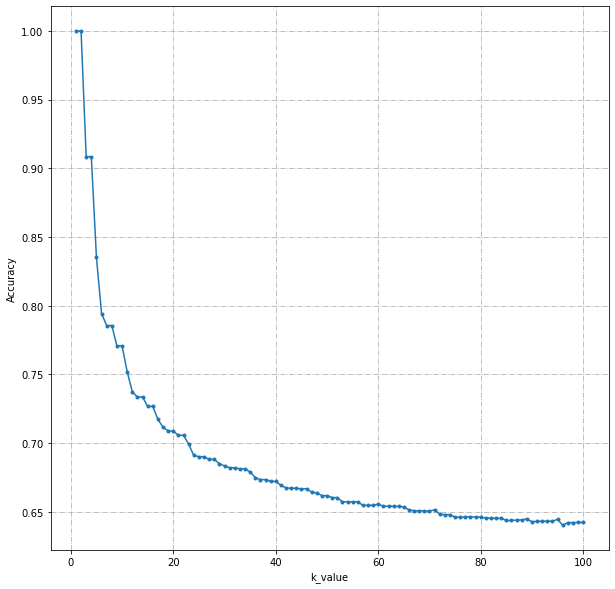

In [379]:
plt.figure(figsize=(10,10))
plt.plot(l1 , acc , marker = '.')
plt.grid(linestyle='-.')
plt.xlabel('k_value')
plt.ylabel('Accuracy')

In [290]:
# here we can also do class imbalance

In [293]:
aknn.income.value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [300]:
aknn.income.value_counts()

0    37155
1    11687
Name: income, dtype: int64